In [1]:
import networkx as nx
import csv
import pandas as pd
import matplotlib.pyplot as plt
import collections
import random
import scipy.stats as st
import numpy as np
from google.colab import files

uploaded = files.upload()


Saving comic-hero-network.gdf to comic-hero-network.gdf
Saving hero-network.csv to hero-network.csv


In [2]:
def graph_from_csv(path):
    graph = nx.Graph(name = 'Heroic Social Network')
    with open(path,'rU') as data:
        reader = csv.reader(data)
        for row in reader:
            graph.add_edge(*row)
    return graph

graph = graph_from_csv('hero-network.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
graph.order()

6428

In [4]:
graph.size()

167220

In [5]:
def graph_from_gdf(path):
    graph = nx.Graph(name = 'Characters in comics')
    with open(path,'rU') as data:
        reader = csv.reader(data)
        for row in reader:
            if 'nodedef' in row[0]:
                handler = lambda row,G : G.add_node(row[0],
                TYPE = row[1])
            elif 'edgedef' in row[0]:
                handler = lambda row,G : G.add_edge(*row)
            else:
                handler(row,graph)

    return graph

graph_from_gdf('comic-hero-network.gdf')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
nx.info(graph)

'Name: Heroic Social Network\nType: Graph\nNumber of nodes: 6428\nNumber of edges: 167220\nAverage degree:  52.0286'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


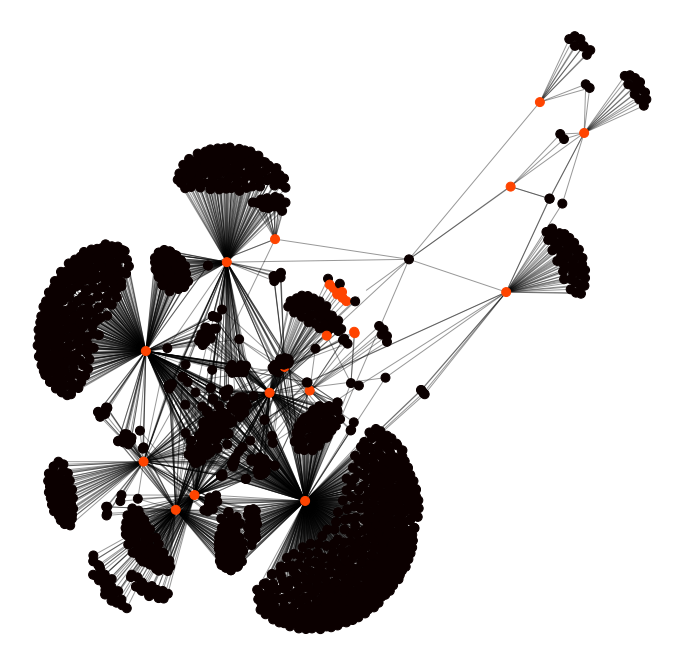

In [7]:
def draw_ego_graph(graph,character,hops = 3):

    ego = nx.ego_graph(graph,character,hops)
    pos = nx.spring_layout(ego)
    plt.figure(figsize = (12,12))
    plt.axis('off')

    ego.nodes[character]['TYPE'] = 'center'
    valmap = {'comic':0.25,'hero':0.54,'center':0.87}
    types = nx.get_node_attributes(ego,'TYPE')
    values = [valmap.get(types[node],0.25) for node in ego.nodes()]

    nx.draw_networkx_edges(ego,pos,alpha = 0.4)
    nx.draw_networkx_nodes(ego,pos,node_size = 80,node_color=values,cmap = plt.cm.hot,with_label = False)

    plt.show()
graph = graph_from_gdf('comic-hero-network.gdf')
draw_ego_graph(graph,"LONGBOW/AMELIA GREER")

In [8]:
nx.info(graph)

'Name: Characters in comics\nType: Graph\nNumber of nodes: 19291\nNumber of edges: 96519\nAverage degree:  10.0066'

In [0]:
def transform_to_weighted_heroes(comics):

    heroes = nx.Graph(name = 'Weighter heroes social network')
    for node ,data in graph.nodes(data = True):
        if data['TYPE'] == 'comic': continue

        heroes.add_node(node, **data)

        for comic in graph[node]:
            for alter in graph[comic]:
                if alter == node :continue

                if alter not in heroes[node]:
                    heroes.add_edge(node,alter,weight = 0.0,
                                    label = 'knows')
                    
                heroes[node][alter]['weight'] += 1.0 /(graph.degree(comic) * 2)

    return heroes

heroes = transform_to_weighted_heroes(graph)

In [0]:
def draw_weighted_ego_graph(graph,character,hops = 1):
    ego = nx.ego_graph(graph,character,hops)
    pos = nx.spring_layout(ego)
    plt.figure(figsize = (12,12))
    plt.axis('off')

    ego.nodes[character]["TYPE"] = "center" 
    valmap = { "hero": 0.0, "center": 1.0 } 
    types = nx.get_node_attributes(ego, "TYPE") 
    values = [valmap.get(types[node], 0.25) for node in ego.nodes()]
    char_edges = ego.edges(data=True, nbunch=[character,]) 
    nonchar_edges = ego.edges(nbunch=[n for n in ego.nodes() 
        if n != character]) 
    elarge=[(u,v) for (u,v,d) in char_edges if d['weight'] >=0.12] 
    esmall=[(u,v) for (u,v,d) in char_edges if d['weight'] < 0.12] 
    print(set([d['weight'] for (u,v,d) in char_edges]))
    nx.draw_networkx_nodes(ego, pos, node_size=200, 
                           node_color=values, cmap=plt.cm.Paired, 
                           with_labels=False) 
    nx.draw_networkx_edges(ego,pos,edgelist=elarge,
                           width=1.5, edge_color='b') 
    nx.draw_networkx_edges(ego,pos,edgelist=esmall, 
                           width=1,alpha=0.5, edge_color='b',
                           style='dashed') 
    nx.draw_networkx_edges(ego,pos,edgelist=nonchar_edges, 
                           width=0.5,alpha=0.2,style='dashed')
    plt.show()


{0.1111111111111111, 0.16666666666666666, 0.05555555555555555}


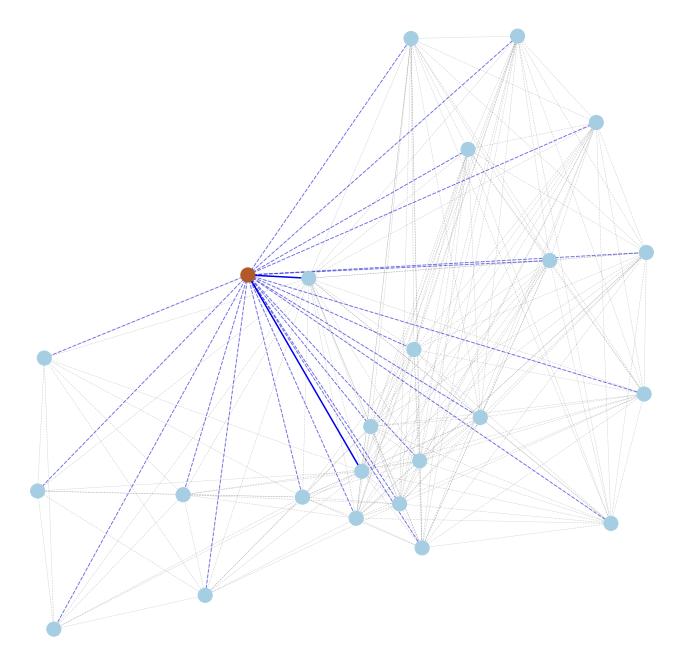

In [11]:
draw_weighted_ego_graph(heroes,"LONGBOW/AMELIA GREER")

In [12]:
import operator
degrees = sorted(dict(heroes.degree()).items(),key = operator.itemgetter(1),reverse = True)
degrees

[('CAPTAIN AMERICA', 1906),
 ('SPIDER-MAN/PETER PAR', 1737),
 ('IRON MAN/TONY STARK ', 1522),
 ('THING/BENJAMIN J. GR', 1416),
 ('MR. FANTASTIC/REED R', 1379),
 ('WOLVERINE/LOGAN ', 1371),
 ('HUMAN TORCH/JOHNNY S', 1361),
 ('SCARLET WITCH/WANDA ', 1325),
 ('THOR/DR. DONALD BLAK', 1289),
 ('BEAST/HENRY &HANK& P', 1267),
 ('VISION ', 1241),
 ('INVISIBLE WOMAN/SUE ', 1236),
 ('HAWK', 1175),
 ('WASP/JANET VAN DYNE ', 1091),
 ('ANT-MAN/DR. HENRY J.', 1082),
 ('CYCLOPS/SCOTT SUMMER', 1081),
 ('ANGEL/WARREN KENNETH', 1073),
 ('STORM/ORORO MUNROE S', 1072),
 ('SHE-HULK/JENNIFER WA', 1071),
 ('DR. STRANGE/STEPHEN ', 1067),
 ('HULK/DR. ROBERT BRUC', 1055),
 ('WONDER MAN/SIMON WIL', 1033),
 ('PROFESSOR X/CHARLES ', 1032),
 ('COLOSSUS II/PETER RA', 1025),
 ('MARVEL GIRL/JEAN GRE', 1005),
 ('HERCULES [GREEK GOD]', 991),
 ('JARVIS, EDWIN ', 986),
 ('SUB-MARINER/NAMOR MA', 977),
 ('DAREDEVIL/MATT MURDO', 967),
 ('ICEMAN/ROBERT BOBBY ', 945),
 ('BLACK WIDOW/NATASHA ', 922),
 ('FURY, COL. NICHOLAS ', 9

In [13]:
centrality = nx.degree_centrality(heroes)
degrees = sorted(centrality.items(), key=operator.itemgetter(1), reverse=True)
for item in degrees[0:10]: print("%s: %0.3f" % item)

CAPTAIN AMERICA: 0.287
SPIDER-MAN/PETER PAR: 0.262
IRON MAN/TONY STARK : 0.229
THING/BENJAMIN J. GR: 0.213
MR. FANTASTIC/REED R: 0.208
WOLVERINE/LOGAN : 0.207
HUMAN TORCH/JOHNNY S: 0.205
SCARLET WITCH/WANDA : 0.200
THOR/DR. DONALD BLAK: 0.194
BEAST/HENRY &HANK& P: 0.191


Text(0, 0.5, 'Frequency')

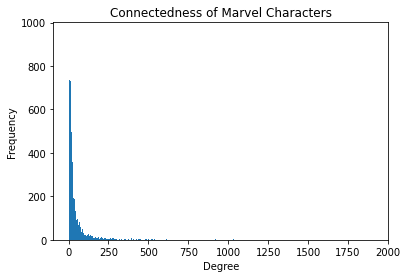

In [14]:
filter(lambda v : v < 500,dict(graph.degree()).values())
plt.hist(dict(heroes.degree()).values(), bins = 500)
plt.title('Connectedness of Marvel Characters')
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [0]:
centrality = nx.betweenness_centrality(heroes)
normalied = nx.betweenness_centrality(heroes,normalized = True)
weighted = nx.betweenness_centrality(heroes,weight = 'weight')

In [0]:
centrality = nx.closeness_centrality(heroes)
normalied = nx.closeness_centrality(heroes,normalized = True)
weighted = nx.closeness_centrality(heroes,distance = 'weight')

In [0]:
centrality = nx.eigenvector_centality(graph)
centrality = nx.eigenvector_centrality_numpy(graph)


In [26]:
def nbest_centrality(graph, metric, n=10,
                     attribute="centrality", **kwargs):
    centrality = metric(graph, **kwargs) 
    degrees = sorted(centrality.items(),key=operator.itemgetter(1), reverse=True)
    for idx, item in enumerate(degrees[0:n]):
        item = (idx+1,) + item 
        print("%i. %s: %0.3f" % item)

nbest_centrality(heroes,nx.degree_centrality)
#nbest_centrality(heroes,nx.betweenness_centrality,normalized = True)
#nbest_centrality(heroes,nx.closeness_centrality)
nbest_centrality(heroes,nx.eigenvector_centrality_numpy)



1. CAPTAIN AMERICA: 0.287
2. SPIDER-MAN/PETER PAR: 0.262
3. IRON MAN/TONY STARK : 0.229
4. THING/BENJAMIN J. GR: 0.213
5. MR. FANTASTIC/REED R: 0.208
6. WOLVERINE/LOGAN : 0.207
7. HUMAN TORCH/JOHNNY S: 0.205
8. SCARLET WITCH/WANDA : 0.200
9. THOR/DR. DONALD BLAK: 0.194
10. BEAST/HENRY &HANK& P: 0.191
1. CAPTAIN AMERICA: 0.116
2. IRON MAN/TONY STARK : 0.103
3. SCARLET WITCH/WANDA : 0.101
4. THING/BENJAMIN J. GR: 0.101
5. SPIDER-MAN/PETER PAR: 0.100
6. MR. FANTASTIC/REED R: 0.100
7. VISION : 0.099
8. HUMAN TORCH/JOHNNY S: 0.099
9. WOLVERINE/LOGAN : 0.098
10. BEAST/HENRY &HANK& P: 0.096


In [36]:
data = np.array(list(dict(heroes.degree()).values()))
np.mean(data)

50.54054868857401

In [37]:
st.mode(data)

ModeResult(mode=array([11]), count=array([254]))

In [38]:
np.median(data)

19.0

In [39]:
nx.density(heroes)

0.007619561086774312

In [41]:
ego = nx.ego_graph(heroes,'LONGBOW/AMELIA GREER')
nx.density(ego)

0.7210144927536232

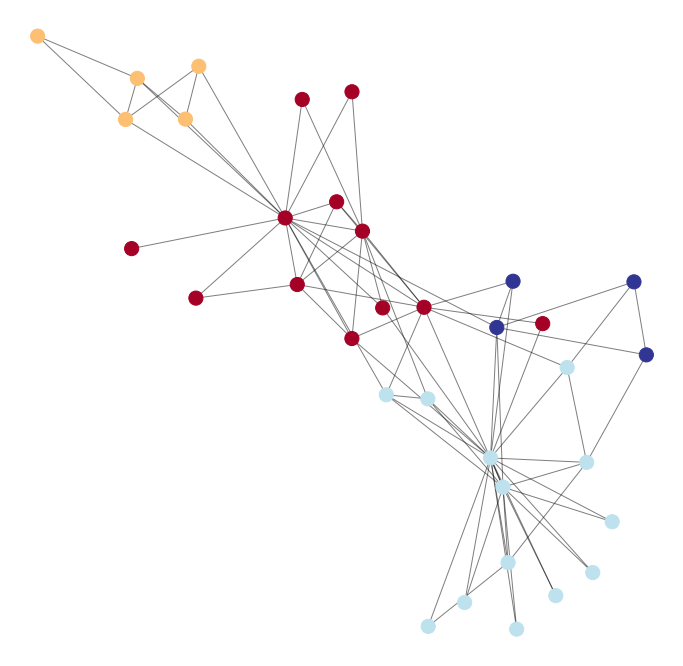

In [67]:
import community
G = nx.karate_club_graph()
partition = community.best_partition(G) 
pos = nx.spring_layout(G) 
plt.figure(figsize=(12,12)) 
plt.axis('off') 
nx.draw_networkx_nodes(G,list(pos.values()), node_size=200, cmap=plt.cm.RdYlBu, node_color=list(partition.values())) 
nx.draw_networkx_edges(G,pos, alpha=0.5)


In [82]:
nx.transitivity(heroes)

0.19445876164329842

In [83]:
nx.average_clustering(heroes)

0.7559837384891842

In [0]:
def detect_communities(graph):
    partition = community.best_partition(graph) 
    return graph, partition


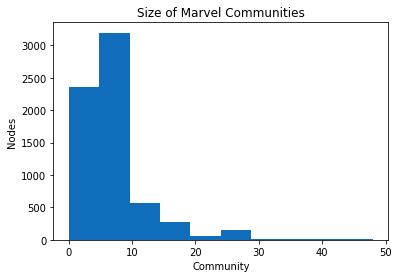

In [99]:
def communities_histogram(graph): 
    graph, partition = detect_communities(graph) 
    numbins = len(partition.values()) 
    plt.hist(partition.values(), color="#0f6dbc") 
    plt.title("Size of Marvel Communities") 
    plt.xlabel("Community") 
    plt.ylabel("Nodes")
communities_histogram(heroes)

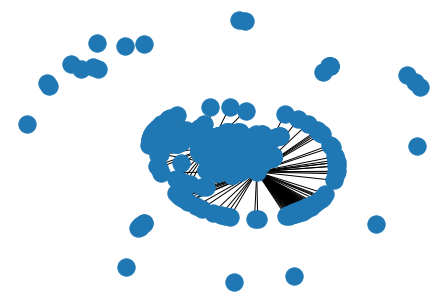

In [100]:
nx.draw(heroes)

In [0]:
G=nx.davis_southern_women_graph() 
pos=nx.spring_layout(G) 
dmin=1 
ncenter=0 
for n in pos: 
    x,y=pos[n] 
    d=(x-0.5)**2+(y-0.5)**2 
    if d<dmin: 
        ncenter=n 
        dmin=d

In [0]:
p=nx.single_source_shortest_path_length(G,ncenter)

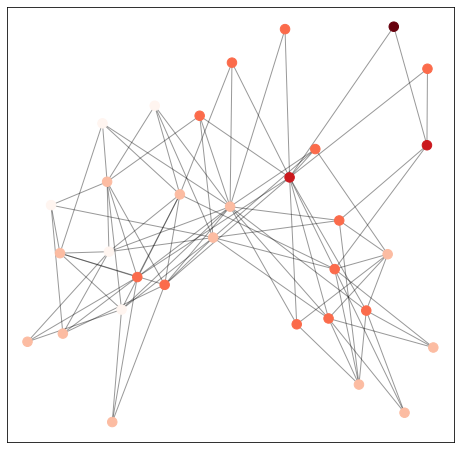

In [104]:
plt.figure(figsize=(8,8)) 
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4) 
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(), node_size=90,node_color=list(p.values()), cmap=plt.cm.Reds_r)